# Why is our beta too big?

In [189]:
%matplotlib inline
import pathlib
import numpy as np
from astropy.time import Time
import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import astropy.units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x161b98eb0>

In [2]:
from solar_spectrum import read_solar_spectrum_sorce, read_solar_spectrum, SolarSpectrum
from effective_areas import read_effective_area, FilterEffectiveArea
from reddening_correction import reddening_correction, DustReddeningPercent
from stack_info import stacked_images_from_stackinfo

# Load the effective areas for the uv and uw1 filters

In [3]:
uvv_ea = read_effective_area(pathlib.Path("data/swift_effective_areas/v.arf"))
uw1_ea = read_effective_area(pathlib.Path("data/swift_effective_areas/w1.arf"))

# Load the modeled solar spectrum (Lucy's)

In [4]:
modeled_spectrum_path = pathlib.Path("data/solar_spectra/sun_1A.csv")
# the time below is a dummy value as the modeled spectrum has no time-related data
modeled_spectrum = read_solar_spectrum(modeled_spectrum_path)

In [123]:
def get_sorce_spectrum(t: Time) -> SolarSpectrum:
    year = t.to_datetime().date().year
    spectrum_path = pathlib.Path("data/solar_spectra/sorce/" + str(year) + "/sorce_ssi_l3.csv")
    ss = read_solar_spectrum_sorce(spectrum_path, t)
    ss.irradiances = ss.irradiances * 100
    return ss

sorce_2004 = get_sorce_spectrum(Time("2004-01-01"))
sorce_2007 = get_sorce_spectrum(Time("2007-01-01"))
sorce_2010 = get_sorce_spectrum(Time("2010-01-01"))

In [7]:
def plot_solar_spectrum(ss: SolarSpectrum, ax, **kwargs) -> None:
    ax.scatter(ss.lambdas, ss.irradiances, marker='.', **kwargs)
    
def plot_effective_area(ea: FilterEffectiveArea, ax, **kwargs) -> None:
    ax.scatter(ea.lambdas, ea.responses*3, marker='o', **kwargs)

# Modeled spectrum vs. sorce 2004, with filter ranges included

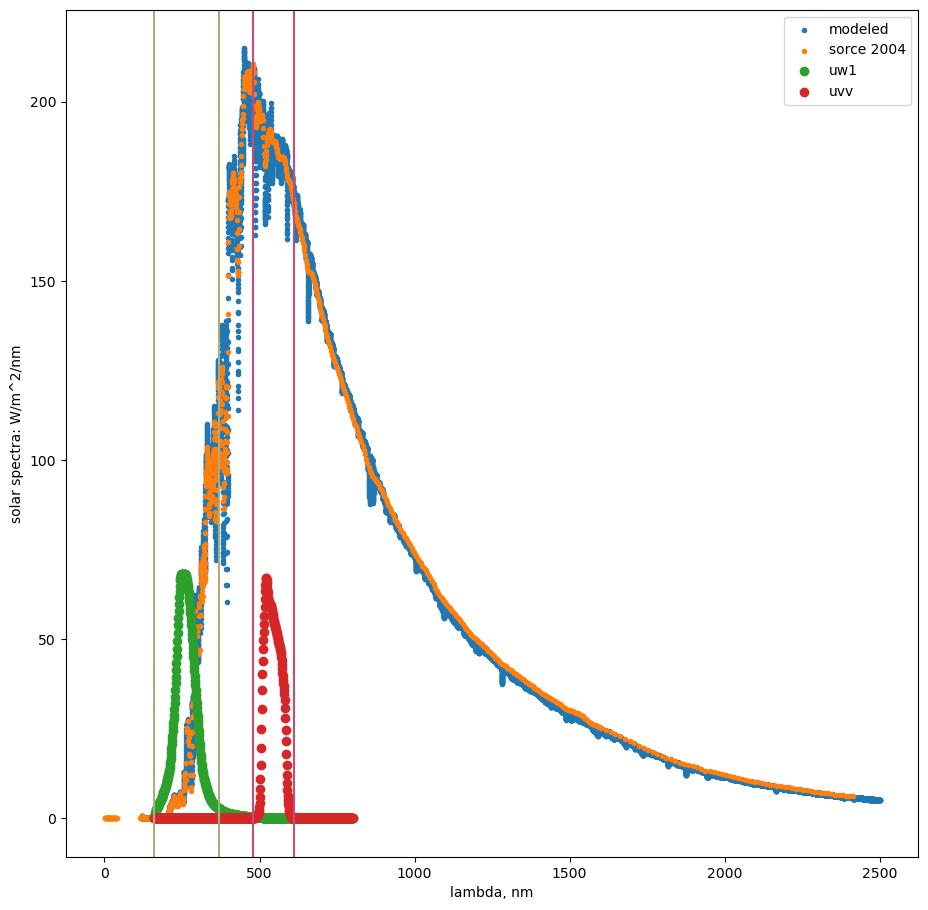

In [8]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(1, 1, 1)

plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2004, ax1, label=f"sorce 2004")

# uw1 filter range and response
plot_effective_area(uw1_ea, ax1, label='uw1')
ax1.axvline(160, color='#afac7c')
ax1.axvline(370, color='#afac7c')

# uvv filter range and response
plot_effective_area(uvv_ea, ax1, label='uvv')
ax1.axvline(480, color='#c74a77')
ax1.axvline(610, color='#c74a77')

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')
plt.legend()

plt.show()

# In the range of the uw1 filter, sorce spectrum from 2004

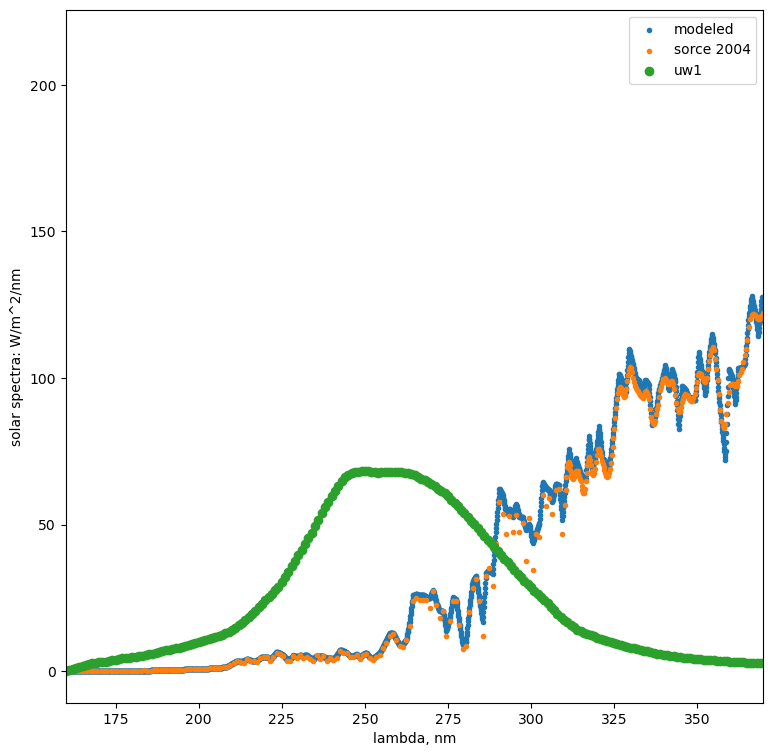

In [9]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(1, 1, 1)

plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2004, ax1, label=f"sorce 2004")

plt.xlim(160, 370)
# uw1 filter range and response
plot_effective_area(uw1_ea, ax1, label='uw1')

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')

plt.legend()
plt.show()

# In the range of the uw1 filter, sorce spectrum from 2007

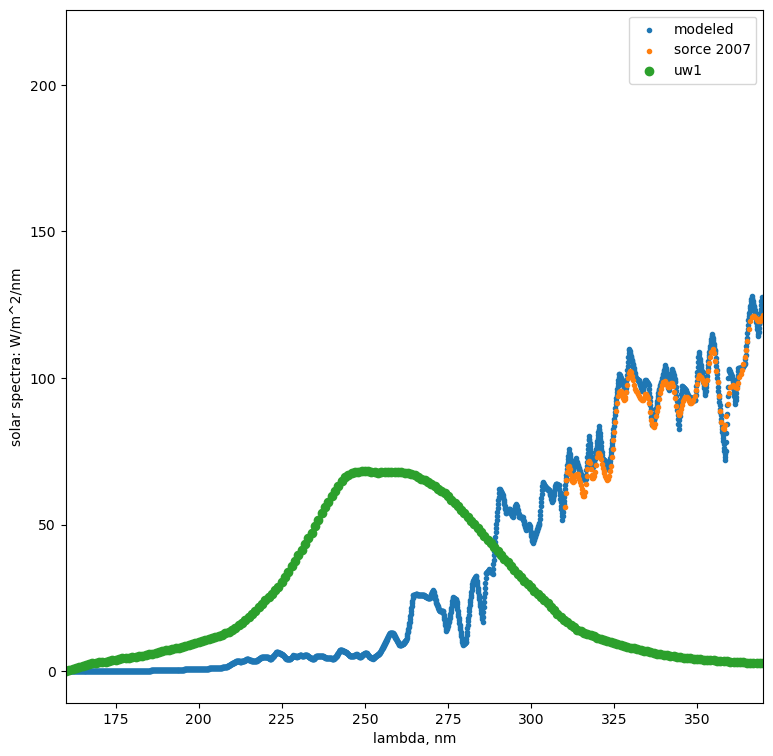

In [10]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(1, 1, 1)
plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2007, ax1, label=f"sorce 2007")

plt.xlim(160, 370)
# uw1 filter range and response
plot_effective_area(uw1_ea, ax1, label='uw1')

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')

plt.legend()
plt.show()

# In the range of the uw1 filter, sorce spectrum from 2010

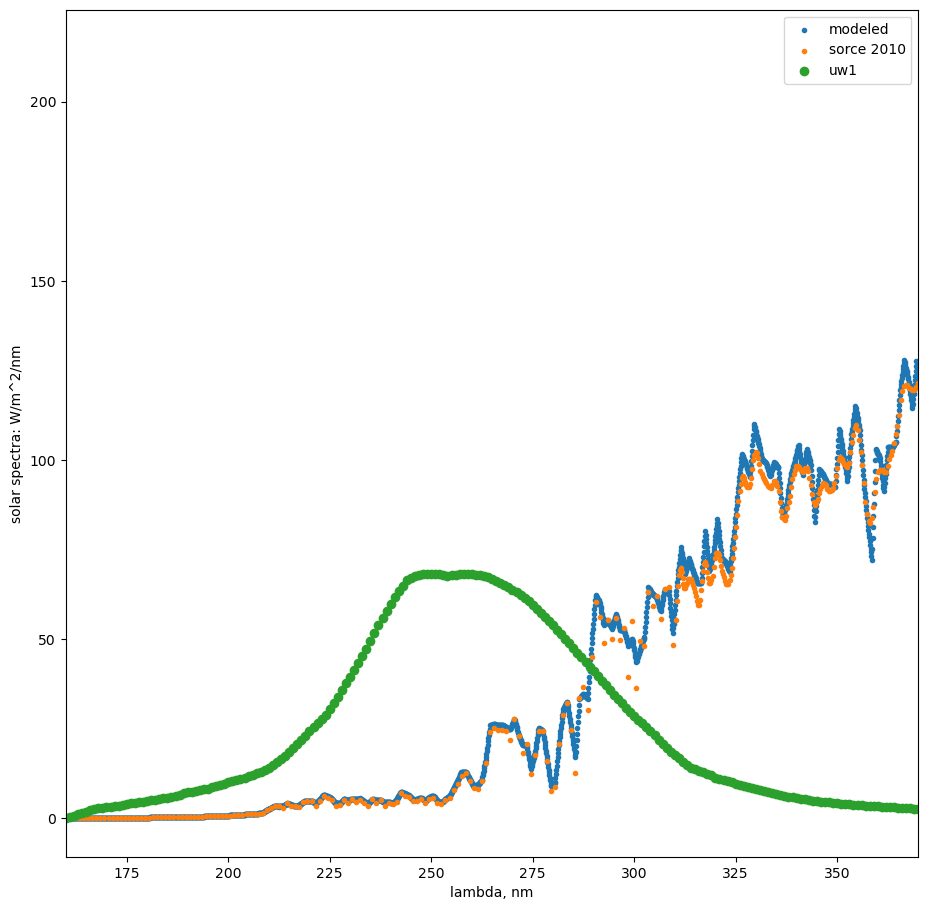

In [11]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(1, 1, 1)
plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2010, ax1, label=f"sorce 2010")

plt.xlim(160, 370)
# uw1 filter range and response
plot_effective_area(uw1_ea, ax1, label='uw1')

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')

plt.legend()
plt.show()

# In the range of the uvv filter, sorce spectrum from 2004

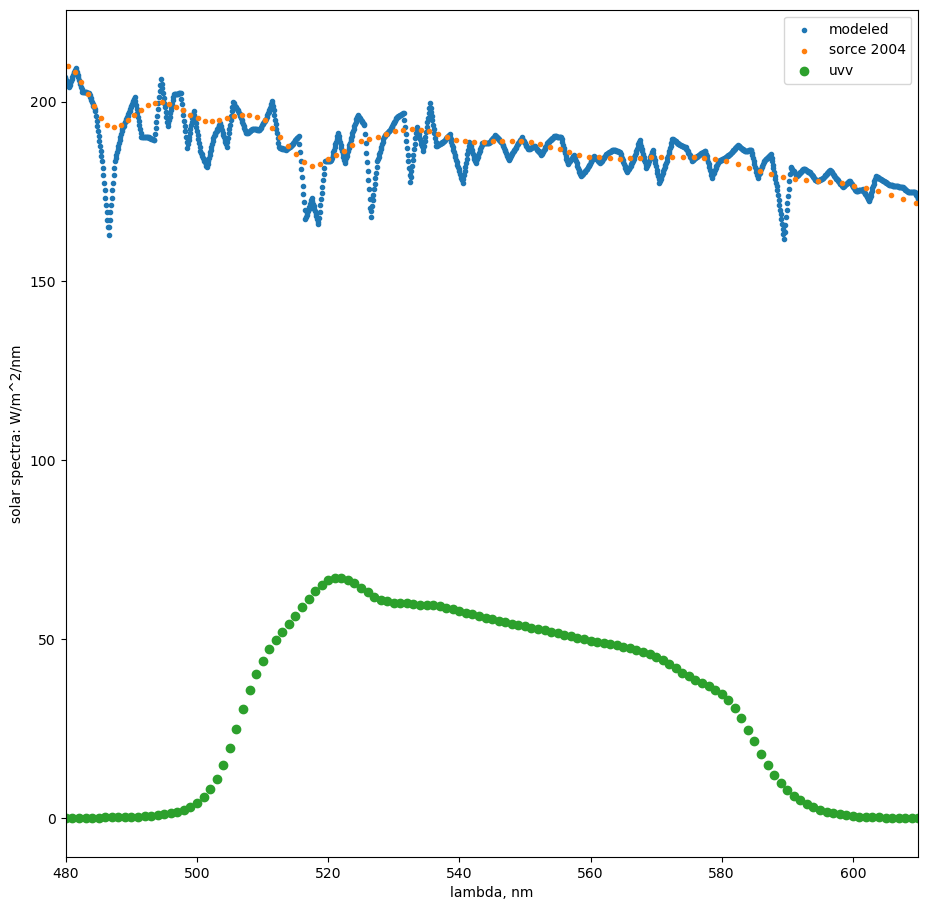

In [12]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(1, 1, 1)

plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2004, ax1, label=f"sorce 2004")

# uvv filter range and response
plot_effective_area(uvv_ea, ax1, label='uvv')

plt.xlim(480, 610)

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')
plt.legend()

plt.show()

# In the range of the uvv filter, sorce spectrum from 2007

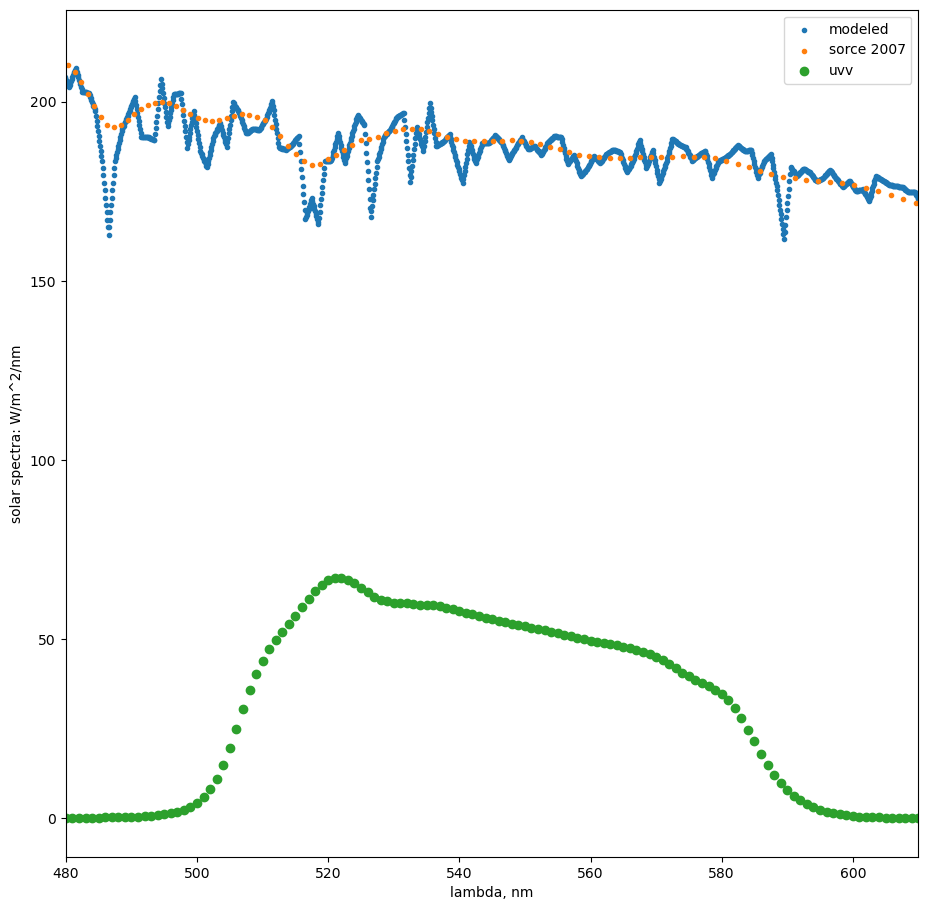

In [13]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(1, 1, 1)

plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2007, ax1, label=f"sorce 2007")

# uvv filter range and response
plot_effective_area(uvv_ea, ax1, label='uvv')

plt.xlim(480, 610)

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')
plt.legend()

plt.show()

# In the range of the uvv filter, sorce spectrum from 2010

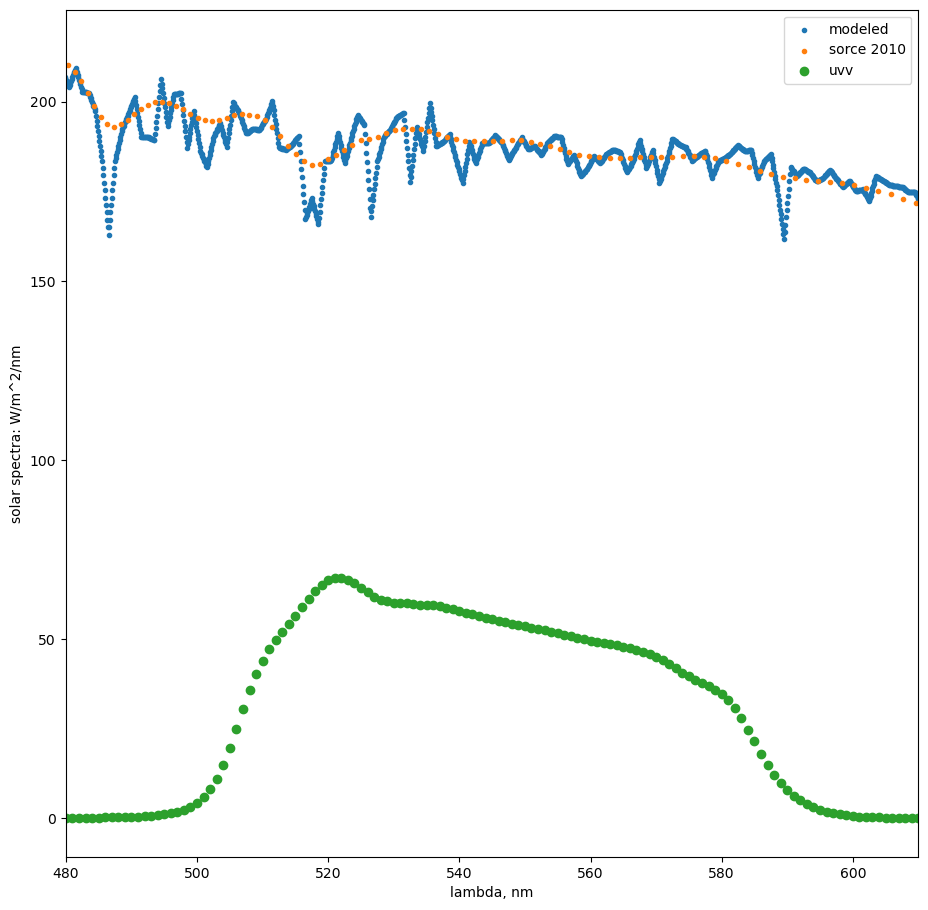

In [15]:
fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(1, 1, 1)

plot_solar_spectrum(modeled_spectrum, ax1, label='modeled')
plot_solar_spectrum(sorce_2010, ax1, label=f"sorce 2010")

# uvv filter range and response
plot_effective_area(uvv_ea, ax1, label='uvv')

plt.xlim(480, 610)

plt.xlabel('lambda, nm')
plt.ylabel('solar spectra: W/m^2/nm')
plt.legend()

plt.show()

### The spectra mostly match - the bad values of beta came from determining $d\lambda$ while integrating, which are unreliable in the spectra files.
### Additionally, the sorce spectra are not guaranteed to have data on the day we are trying to look up! 2007-01-01 is an example.

## To fix this, we interpolate both the spectrum and filter response over a new **np.linspace**

In [121]:
# Convolution of the solar spectrum with a filter effective area
def solar_count_rate_in_filter(
    solar_spectrum: SolarSpectrum,
    effective_area: FilterEffectiveArea,
    num
) -> float:
    """
    use effective area and theoretical spectra to calculate apparent magnitude
    """
    
    solar_lambdas = solar_spectrum.lambdas
    solar_irradiances = solar_spectrum.irradiances

    ea_lambdas = effective_area.lambdas
    ea_responses = effective_area.responses
    
    # pick new set of lambdas to do the convolution over - the spectrum's range of wavelengths is much larger than the filter, so
    # the filter's wavelengths will determine the bounds of the integration
    lambdas, dlambda = np.linspace(np.min(ea_lambdas), np.max(ea_lambdas), endpoint=True, num=num, retstep=True)

    # interpolate solar spectrum on new lambdas
    solar_irradiances_interpolation = interp1d(solar_lambdas, solar_irradiances)
    solar_irradiances_on_filter_lambdas = solar_irradiances_interpolation(lambdas)
    
    # interpolate responses on new lambdas
    ea_response_interpolation = interp1d(ea_lambdas, ea_responses)
    ea_responses_on_lambdas = ea_response_interpolation(lambdas)
    
    # assemble columns of [lambdas, irradiances, responses]
    spec = np.c_[
        np.c_[lambdas, solar_irradiances_on_filter_lambdas.T], ea_responses_on_lambdas.T
    ]

    cr = np.sum(spec[:, 0] * spec[:, 1] * spec[:, 2]) * dlambda * 1e7 * 5.034116651114543

    return cr

def calculate_beta_at_time(t: Time) -> float:
    ss = get_sorce_spectrum(t)
    solar_counts_in_uw1 = solar_count_rate_in_filter(ss, uw1_ea, num=1000)
    solar_counts_in_uvv = solar_count_rate_in_filter(ss, uvv_ea, num=1000)
    #print(f"{solar_counts_in_uw1=}\t{solar_counts_in_uvv=}")
    return solar_counts_in_uw1/solar_counts_in_uvv

def calculate_beta_with_spectrum(ss: SolarSpectrum, num) -> float:
    solar_counts_in_uw1 = solar_count_rate_in_filter(ss, uw1_ea, num)
    solar_counts_in_uvv = solar_count_rate_in_filter(ss, uvv_ea, num)
    #print(f"{solar_counts_in_uw1=}\t{solar_counts_in_uvv=}")
    return solar_counts_in_uw1/solar_counts_in_uvv

# How big does the interpolation space need to be so that beta converges?  num $\approx$ 1000

In [117]:
for num in [5, 10, 100, 1000, 10_000, 100_000, 1_000_000]:
    print(f"Interpolation points: {num}")
    print(f"2004 beta:\t{calculate_beta_with_spectrum(sorce_2004, num)}")
    #print("-------")
    print(f"2007 beta:\t{calculate_beta_with_spectrum(sorce_2007, num)}")
    #print("-------")
    print(f"2010 beta:\t{calculate_beta_with_spectrum(sorce_2010, num)}")
    #print("-------")
    print(f"modeled beta:\t{calculate_beta_with_spectrum(modeled_spectrum, num)}")
    print("-------")

Interpolation points: 5
2004 beta:	18.417108704256307
2007 beta:	nan
2010 beta:	18.11863139919334
modeled beta:	19.54569830156103
-------
Interpolation points: 10
2004 beta:	0.08147712241536179
2007 beta:	nan
2010 beta:	0.08385380556547908
modeled beta:	0.08368744113364995
-------
Interpolation points: 100
2004 beta:	0.10284645679912972
2007 beta:	nan
2010 beta:	0.10376275015973108
modeled beta:	0.10776111528871701
-------
Interpolation points: 1000
2004 beta:	0.09892327558817313
2007 beta:	nan
2010 beta:	0.09971438423805243
modeled beta:	0.10433460455482668
-------
Interpolation points: 10000
2004 beta:	0.09892379313309634
2007 beta:	nan
2010 beta:	0.09971756626787842
modeled beta:	0.10437289179867229
-------
Interpolation points: 100000
2004 beta:	0.09892378404809403
2007 beta:	nan
2010 beta:	0.09971755456563727
modeled beta:	0.10437246216352007
-------
Interpolation points: 1000000
2004 beta:	0.09892378812106906
2007 beta:	nan
2010 beta:	0.09971755863463772
modeled beta:	0.104372464

# How does beta change across the timespan of 2004 - 2019 for June 1st?

In [133]:
sorce_year_first = 2004
sorce_year_last = 2019
sorce_years = range(sorce_year_first, sorce_year_last+1)
num_years = len(sorce_years)

# bad: 2006, 2008

betas = {}
for year in sorce_years:
    t = Time(str(year) + "-06-01")
    betas[t] = calculate_beta_at_time(t)
    print(f"{t} ===> beta: {betas[t]}")

2004-06-01 00:00:00.000 ===> beta: 0.09911299722709666
2005-06-01 00:00:00.000 ===> beta: 0.09898059767310581
2006-06-01 00:00:00.000 ===> beta: 0.09910875148592363
2007-06-01 00:00:00.000 ===> beta: 0.09927454613835827
2008-06-01 00:00:00.000 ===> beta: 0.0993511102149263
2009-06-01 00:00:00.000 ===> beta: 0.09961520713718117
2010-06-01 00:00:00.000 ===> beta: 0.09991315482372741
2011-06-01 00:00:00.000 ===> beta: 0.10019833706157658
2012-06-01 00:00:00.000 ===> beta: 0.10017289104542335
2013-06-01 00:00:00.000 ===> beta: 0.10027016224651318
2014-06-01 00:00:00.000 ===> beta: 0.10023948875141511
2015-06-01 00:00:00.000 ===> beta: 0.10049370901266964
2016-06-01 00:00:00.000 ===> beta: 0.1001969054850503
2017-06-01 00:00:00.000 ===> beta: 0.10012104419953367
2018-06-01 00:00:00.000 ===> beta: 0.10024557685633186
2019-06-01 00:00:00.000 ===> beta: 0.10006142906750133


# Statistics for beta - can we justify skipping the calculation of beta and hard-coding one?

In [146]:
beta_list = list(betas.values())

print(f"Beta avg: {np.mean(beta_list)}, median: {np.median(beta_list)}, sigma: {np.std(beta_list)}, var: {np.var(beta_list)}")

Beta avg: 0.09983474427664589, median: 0.1000912366335175, sigma: 0.0004903507384485646, var: 2.4044384669705266e-07


# Do we see the solar cycle with this data?  If we do, then this should represent upper and lower bounds to beta (until the filters degrade - then this needs to be redone)

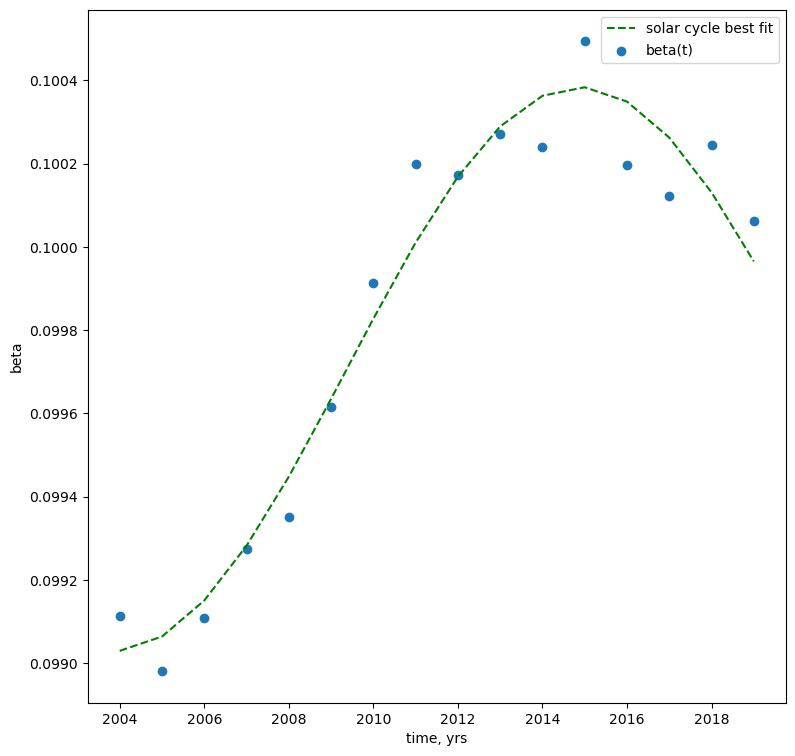

In [188]:
def solar_cycle(t, amplitude, delta, beta_offset) -> float:
    # if we fix the period at 22 years, do we get a good fit?
    period = 22
    return amplitude * np.sin((2 * np.pi / period) * t - delta) + beta_offset

beta_years = np.array(list(map(lambda x: x.to_datetime().date().year, list(betas.keys()))))
popt, pcov = curve_fit(solar_cycle, beta_years, list(betas.values()))

fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(1, 1, 1)
plt.plot(beta_years, solar_cycle(beta_years, *popt), 'g--', label='solar cycle best fit')
ax1.scatter(beta_times, list(betas.values()), label='beta(t)')

plt.xlabel('time, yrs')
plt.ylabel('beta')
plt.legend()

plt.show()